# Exercise 1

In this exercise we use the Iris dataset, which is a 3-class dataset in which 1 class is linearly separable from the others but the other are not linearly separable from each other. The classes correpond to different types of Iris plants while the 4 features represent the dimensions of the leaves. It is a typical test case for many statistical classification techniques in machine learning. You can read more here: https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset

We can load the dataset with:

In [1]:
from sklearn.datasets import load_iris
(X, y) = load_iris(return_X_y=True)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 150 samples in the dataset. X has 4 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

We can plot some features against each other to see how the features relate to each other:

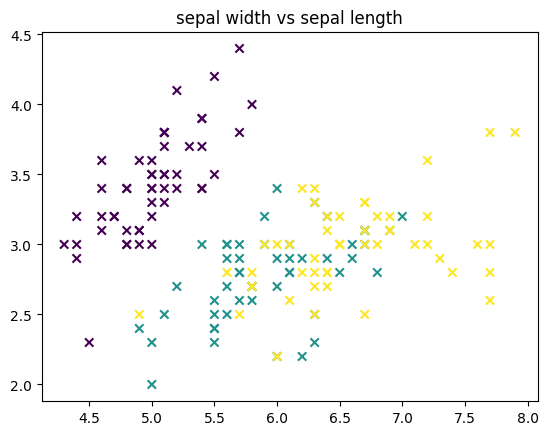

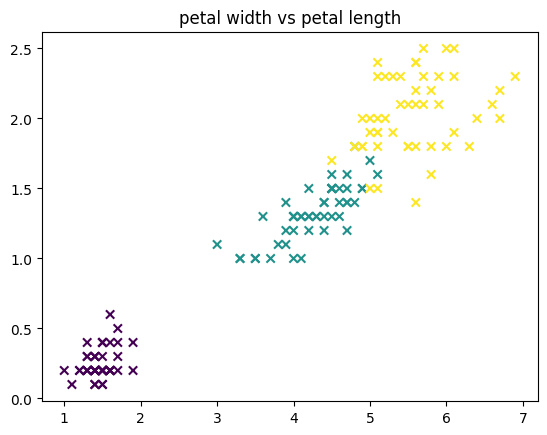

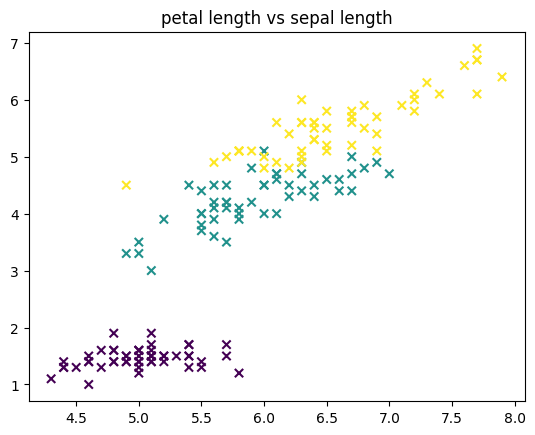

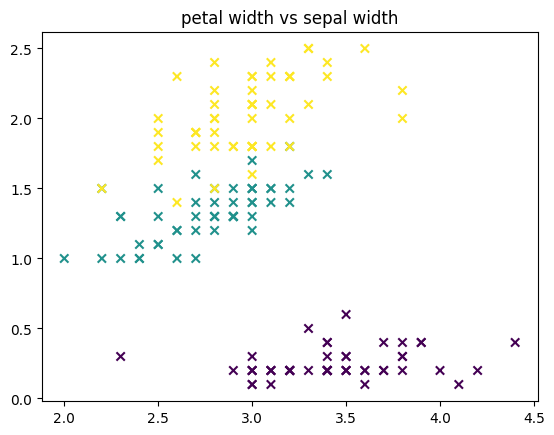

In [4]:
features = ["sepal length", "sepal width", "petal length", "petal width"]

permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], marker="x", c=y)
    plt.show()

We can see that one class is separable from the others, while perfectly separating the other two classes linearly is not possible. Your tasks in this notebook are now:

- Add and adapt your classification code from the binary classification exercise, so that is can predict the class label for each sample.
- Use the sklearn method [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to obtain an evaluation of the classification performance. The result should be:

<pre>
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9600    0.9600    0.9600        50
          2     0.9600    0.9600    0.9600        50

avg / total     0.9733    0.9733    0.9733       150
</pre>

## Solution


In [10]:
import numpy as np

# size update for input 4 dimensions to 5
ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_mat = np.c_[X, ones] # concatenate the ones with the dataset

In [11]:

weights = (np.linalg.pinv(X_mat.T @ X_mat) @ X_mat.T) @ y


In [12]:
# Calculate predictions
predictions = X_mat @ weights
y_pred_round = np.round(predictions).astype(int)

In [13]:
# Classification report using sklearn
from sklearn.metrics import classification_report, precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt  
print("Classification Report:")
print(classification_report(y, y_pred_round,digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        50
           1     0.9600    0.9600    0.9600        50
           2     0.9600    0.9600    0.9600        50

    accuracy                         0.9733       150
   macro avg     0.9733    0.9733    0.9733       150
weighted avg     0.9733    0.9733    0.9733       150

